![image](https://www.shell.com/energy-and-innovation/the-energy-future/scenarios/shell-scenario-sky/_jcr_content/pageCarouselImage.img.960.jpeg/1521983923121/future-of-energy-homepage-r.jpeg?imwidth=960)


> About the Host
# 🔌ASHRAE -Start Here: A GENTLE Introduction

- <a href='#1'>1. Introduction: ASHRAE - Great Energy Predictor III</a>
    - <a href='#1-1'>1.1. Data Description</a>
    - <a href='#1-2'>1.2. Evaluation Metric</a>
- <a href='#2'>2. Imports</a>
- <a href='#3'>3. Read in Data</a>
- <a href='#4'>4. Glimpse of Data</a>
- <a href='#5'>5. Reducing Memory Size</a>
- <a href='#6'>6. Exploratory Data Analysis</a>
    - <a href='#6-1'>6.1. Examine the Distribution of the Target Column</a>
    - <a href='#6-2'>6.2. Missing data and zeros visualized</a>
    - <a href='#6-3'>6.3. Examine Missing Values</a>
    - <a href='#6-4'>6.4. Column Types</a>
    - <a href='#6-5'>6.5. Correlations</a>
- <a href='#7'>7. Ploting</a>
- <a href='#8'>8. Simple Single Series Analysis</a>
- <a href='#9'>9. Outlier Distribution</a>
    - <a href='#9-1'>9.1. Group data in a daily basis</a>
    - <a id='9-2'>9.2. Aggregate the data for buildings</a>
    - <a href='#9-3'>9.3. Identifying outliers</a>
- <a href='#10'>10. Simple Feature Engineering and Modeling</a>
    - <a href='#10-1'>10.1. Building DF merge through concat</a>
    - <a href='#10-2'>10.2. Weather DF merge over concat</a>
- <a href='#11'>11. ASHRAE - Data minification</a>
- <a href='#12'>12. Some Features</a>
- <a href='#13'>13. Encoding Variables</a>
- <a href='#14'>14. Handling missing values</a>
- <a href='#15'>15. ASHRAE Ligthgbm Simple Fe </a>
- <a href='#16'>ASHRAE Energy prediction - small summary</a>
- <a href='#17'>17. Final</a>




    

# <a id='1'>1. Introduction: ASHRAE - Great Energy Predictor III</a>


### How much energy will a building consume?

* Q: How much does it cost to cool a skyscraper in the summer?
* A: A lot! And not just in dollars, but in environmental impact.

Thankfully, significant investments are being made to improve building efficiencies to reduce costs and emissions. So, are the improvements working? That’s where you come in. Current methods of estimation are fragmented and do not scale well. Some assume a specific meter type or don’t work with different building types.

Developing energy savings has two key elements: Forecasting future energy usage without improvements, and forecasting energy use after a specific set of improvements have been implemented, like the installation and purchase of investment-grade meters, whose prices continue to fall. One issue preventing more aggressive growth of the energy markets are the lack of cost-effective, accurate, and scalable procedures for forecasting energy use.

In this competition, you’ll develop accurate predictions of metered building energy usage in the following areas: chilled water, electric, natural gas, hot water, and steam meters. The data comes from over 1,000 buildings over a three-year timeframe.

With better estimates of these energy-saving investments, large scale investors and financial institutions will be more inclined to invest in this area to enable progress in building efficiencies.


   Founded in 1894, [ASHRAE](https://www.kaggle.com/orgs-under-maintenance) serves to advance the arts and sciences of heating, ventilation, air conditioning refrigeration and their allied fields. ASHRAE members represent building system design and industrial process professionals around the world. With over 54,000 members serving in 132 countries, ASHRAE supports research, standards writing, publishing and continuing education - shaping tomorrow’s built environment today.



<html>
<body>

<p><font size="4" color="Green"> ASHRAE 90.1-2016, Energy Standard for Buildings - Review of Changes</font></p>
</body>
</html>


In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML


HTML('<iframe width="1106" height="622" src="https://www.youtube.com/embed/NZyQu1u3N9Y" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## <a id='1-1'>1.1 Data</a>


<a href='#1'>Top</a>

<p><font size="3" color="green" style="Comic Sans MS;">

Assessing the value of energy efficiency improvements can be challenging as there's no way to truly know how much energy a building would have used without the improvements. The best we can do is to build counterfactual models. Once a building is overhauled the new (lower) energy consumption is compared against modeled values for the original building to calculate the savings from the retrofit. More accurate models could support better market incentives and enable lower cost financing.

This competition challenges you to build these counterfactual models across four energy types based on historic usage rates and observed weather. The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.
</font></p>

### Files
> #### train.csv
- building_id - Foreign key for the building metadata.
- meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, hotwater: 3}. Not every building has all meter types.
- timestamp - When the measurement was taken
- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error.
> #### building_meta.csv
- site_id - Foreign key for the weather files.
- building_id - Foreign key for training.csv
- primary_use - Indicator of the primary category of activities for the building based on [EnergyStar](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type) property type definitions
- square_feet - Gross floor area of the building
- year_built - Year building was opened
- floor_count - Number of floors of the building
> #### weather_[train/test].csv
Weather data from a meteorological station as close as possible to the site.

- site_id
- air_temperature - Degrees Celsius
- cloud_coverage - Portion of the sky covered in clouds, in [oktas](https://en.wikipedia.org/wiki/Okta)
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second
> #### test.csv
The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

row_id - Row id for your submission file
- building_id - Building id code
- meter - The meter id code
- timestamp - Timestamps for the test data period
> ####  sample_submission.csv
A valid sample submission.

<p><font size="3" color="green" style="Comic Sans MS;">

All floats in the solution file were truncated to four decimal places; we recommend you do the same to save space on your file upload.
There are gaps in some of the meter readings for both the train and test sets. Gaps in the test set are not revealed or scored. 
</font></p>


## <a id='1-1'>1.2 Evaluation Metric</a>

We will be evaluated by the metirc `Root Mean Squared Logarithmic Error`.

The RMSLE is calculated as:
The RMSLE is calculated as

$ ϵ=1n∑i= \sqrt{ 1/n (log(pi+1)−log(ai+1))^2 } $
Where:

- ϵ is the RMSLE value (score)
- n is the total number of observations in the (public/private) data set,
- pi is your prediction of target, and
- ai is the actual target for i.
- log(x) is the natural logarithm of x

Understanding and optimizing your predictions for this evaluation metric is paramount for this compeition.


<html>
<body>

<p><font size="5" color="Blue">If you find this kernel useful or interesting, please don't forget to upvote the kernel =)

</body>
</html>



# <a id='2'>2. Imports </a>

<a href='#1'>Top</a>

> We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 150)

py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os,random, math, psutil, pickle    

# <a id='3'>3. Read in Data </a>

<a href='#1'>Top</a>

<p><font size="3" color="green" style="Comic Sans MS;">

First, we can list all the available data files. There are a total of 6 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 4 other files containing additional information about energy types based on historic usage rates and observed weather.
</font></p>

In [3]:
print(os.listdir("../input/ashrae-energy-prediction/"))

['sample_submission.csv', 'building_metadata.csv', 'weather_test.csv', 'train.csv', 'test.csv', 'weather_train.csv']


In [4]:
%%time
root = '../input/ashrae-energy-prediction/'
train_df = pd.read_csv(root + 'train.csv')
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')

weather_train_df = pd.read_csv(root + 'weather_train.csv')
test_df = pd.read_csv(root + 'test.csv')
weather_test_df = pd.read_csv(root + 'weather_test.csv')
building_meta_df = pd.read_csv(root + 'building_metadata.csv')
sample_submission = pd.read_csv(root + 'sample_submission.csv')

CPU times: user 39.4 s, sys: 7.15 s, total: 46.6 s
Wall time: 45.5 s


# <a id='4'>4. Glimpse of Data</a>

<a href='#1'>Top</a>

In [5]:
print('Size of train_df data', train_df.shape)
print('Size of weather_train_df data', weather_train_df.shape)
print('Size of weather_test_df data', weather_test_df.shape)
print('Size of building_meta_df data', building_meta_df.shape)

Size of train_df data (20216100, 4)
Size of weather_train_df data (139773, 9)
Size of weather_test_df data (277243, 9)
Size of building_meta_df data (1449, 6)


# <a id='5'>5. Reducing Memory Size</a>

<a href='#1'>Top</a>


<p><font size="3" color="green" style="Comic Sans MS;">
It is necessary that after using this code, carefully check the output results for each column.
</font></p>

In [6]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


<p><font size="3" color="green" style="Comic Sans MS;">
Reducing memory
</font></p>

In [7]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

weather_train_df = reduce_mem_usage(weather_train_df)
weather_test_df = reduce_mem_usage(weather_test_df)
building_meta_df = reduce_mem_usage(building_meta_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)




<html>
<body>
<p><font size="5" color="Red">🔓MEMORY USAGE AFTER COMPLETION:</font></p>
<p>Mem. usage decreased to  : <b> 289.19 Mb (53.1% reduction)</b></p>
<p>Mem. usage decreased to  : <b>  6.08 Mb (68.1% reduction)</b></p>
<p>Mem. usage decreased to  : <b> 0.03 Mb (60.3% reduction)</b></p>

</body>
</html>





> #### train_df data

In [8]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [9]:
train_df.columns.values

array(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype=object)

> #### weather_train_df data

In [10]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [11]:
weather_train_df.columns.values

array(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'], dtype=object)

> #### weather_test_df data

In [12]:
weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


In [13]:
weather_test_df.columns.values

array(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'], dtype=object)

> #### building_meta_df data

In [14]:
building_meta_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [15]:
building_meta_df.columns.values

array(['site_id', 'building_id', 'primary_use', 'square_feet',
       'year_built', 'floor_count'], dtype=object)

# <a id='6'>6. Exploratory Data Analysis</a>

<a href='#1'>Top</a>


<p><font size="3" color="green" style="Comic Sans MS;">
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. 
</font></p>

## <a id='6-1'>6.1 Examine the Distribution of the Target Column</a>


<p><font size="3" color="green" style="Comic Sans MS;">
The target is meter_reading - Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error.</font></p>


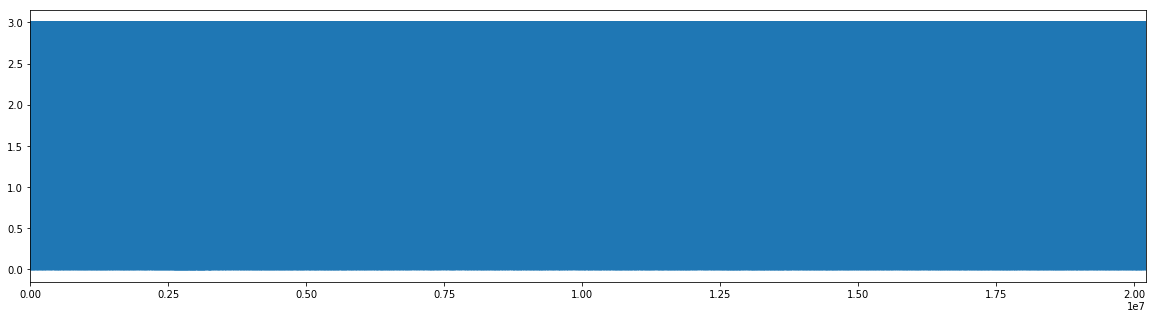

In [16]:
for key, d in train_df.groupby('meter_reading'):
    break
    d.head()
plt.figure(figsize = (20,5))
d['meter'].plot()

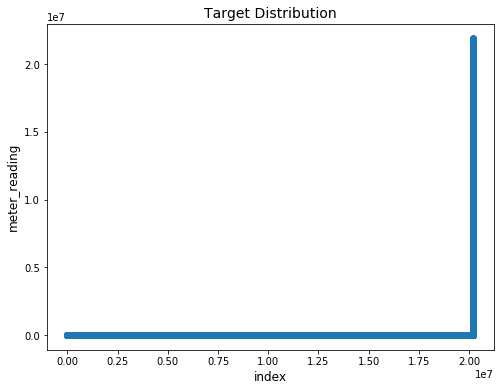

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['meter_reading'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('meter_reading', fontsize=12)
plt.title("Target Distribution", fontsize=14)
plt.show()

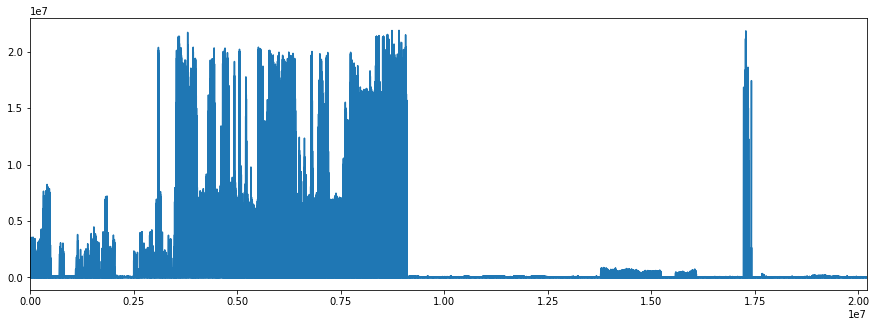

In [18]:
plt.figure(figsize = (15,5))
train_df['meter_reading'].plot()

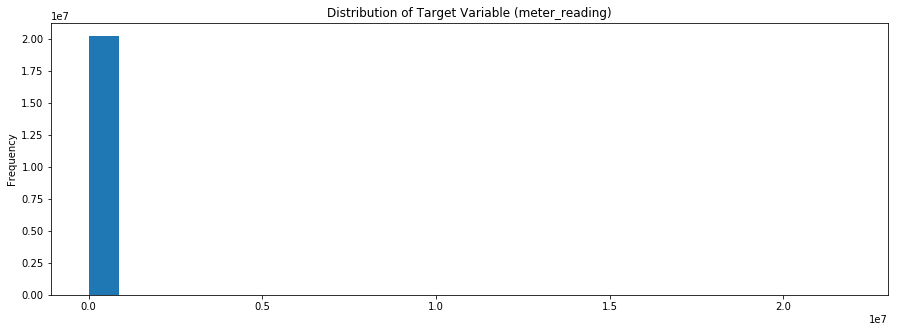

In [19]:
train_df['meter_reading'].plot(kind='hist',
                            bins=25,
                            figsize=(15, 5),
                           title='Distribution of Target Variable (meter_reading)')
plt.show()

## <a id='6-2'>6.2 Missing data and zeros visualized</a>


look that by ganfear:[ Missing data and zeros visualized](https://www.kaggle.com/ganfear/missing-data-and-zeros-visualized)




<p><font size="3" color="green" style="Comic Sans MS;">
Goal: for each building and meter pair, visualize where target is missing and where target is zero VS time.


</font></p>


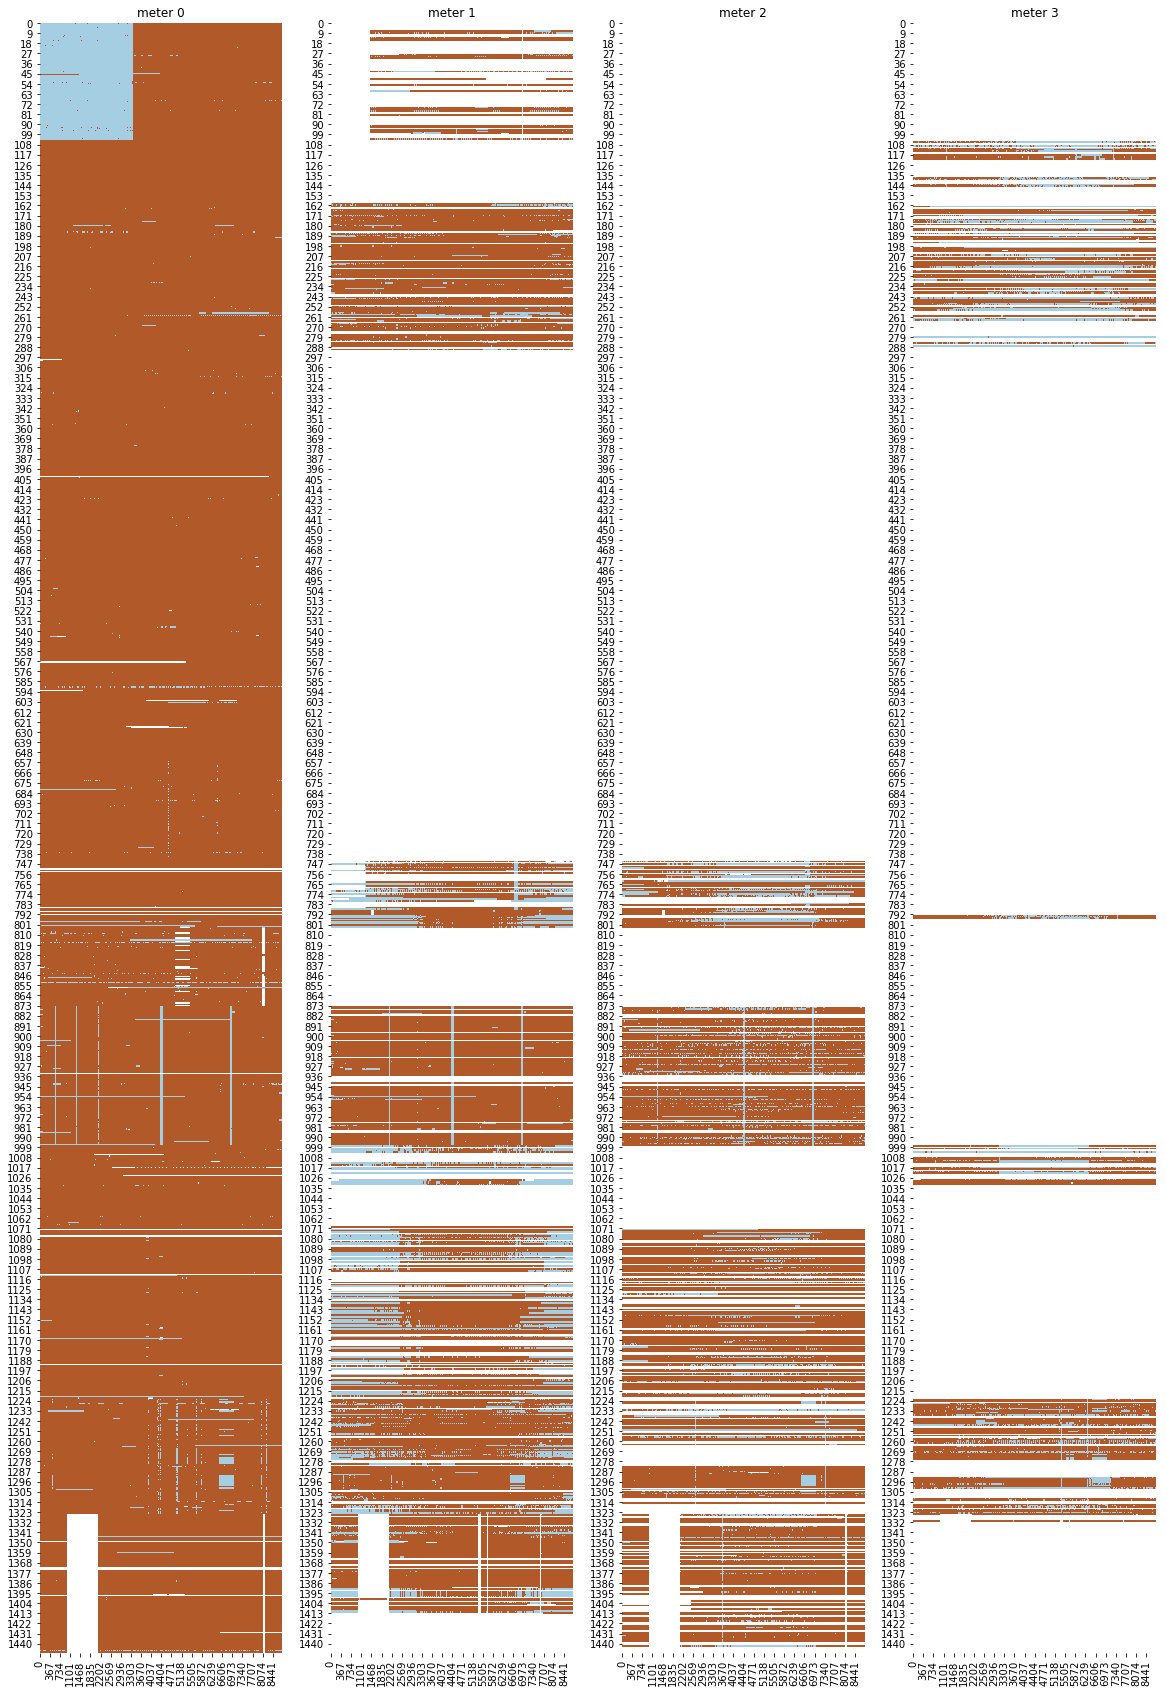

In [20]:
# Load data
train = train_df.set_index(['timestamp'])

# Plot missing values per building/meter
f,a=plt.subplots(1,4,figsize=(20,30))
for meter in np.arange(4):
    df = train[train.meter==meter].copy().reset_index()
    df['timestamp'] = pd.to_timedelta(df.timestamp).dt.total_seconds() / 3600
    df['timestamp'] = df.timestamp.astype(int)
    df.timestamp -= df.timestamp.min()
    missmap = np.empty((1449, df.timestamp.max()+1))
    missmap.fill(np.nan)
    for l in df.values:
        if l[2]!=meter:continue
        missmap[int(l[1]), int(l[0])] = 0 if l[3]==0 else 1
    a[meter].set_title(f'meter {meter:d}')
    sns.heatmap(missmap, cmap='Paired', ax=a[meter], cbar=False)

- Vertical blue lines may be suspicious

Legend:
* X axis: hours elapsed since Jan 1st 2016, for each of the 4 meter types
* Y axis: building_id
* Brown: meter reading available with non-zero value
* Light blue: meter reading available with zero value
* White: missing meter reading

## <a id='6-3'>6.3 Examine Missing Values</a>


<p><font size="3" color="green" style="Comic Sans MS;">
Next we can look at the number and percentage of missing values in each column. 

</font></p>



### checking missing data for train_df

In [21]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(4)

,Total,Percent
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


### checking missing data for weather_train_df

In [22]:
# checking missing data
total = weather_train_df.isnull().sum().sort_values(ascending = False)
percent = (weather_train_df.isnull().sum()/weather_train_df.isnull().count()*100).sort_values(ascending = False)
missing_weather_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_weather_data.head(9)

,Total,Percent
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
timestamp,0,0.000000
site_id,0,0.000000


### checking missing data for weather_test_df

In [23]:
# checking missing data
total = weather_test_df.isnull().sum().sort_values(ascending = False)
percent = (weather_test_df.isnull().sum()/weather_test_df.isnull().count()*100).sort_values(ascending = False)
missing_weather_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_weather_test_data.head(9)

,Total,Percent
cloud_coverage,140448,50.658808
precip_depth_1_hr,95588,34.478057
sea_level_pressure,21265,7.670167
wind_direction,12370,4.461790
wind_speed,460,0.165919
dew_temperature,327,0.117947
air_temperature,104,0.037512
timestamp,0,0.000000
site_id,0,0.000000


### checking missing data for building_meta_df

In [24]:
# checking missing data
total = building_meta_df.isnull().sum().sort_values(ascending = False)
percent = (building_meta_df.isnull().sum()/building_meta_df.isnull().count()*100).sort_values(ascending = False)
missing_building_meta_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_building_meta_df.head(6)

,Total,Percent
floor_count,1094,75.500345
year_built,774,53.416149
square_feet,0,0.000000
primary_use,0,0.000000
building_id,0,0.000000
site_id,0,0.000000


## <a id='6-4'>6.4 Column Types</a>


Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables ([which can be either discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). `object` columns contain strings and are  [categorical features.](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) . 

In [25]:
# Number of each type of column
train_df.dtypes.value_counts()

int16             1
float32           1
datetime64[ns]    1
int8              1
dtype: int64

In [26]:
# Number of unique classes in each object column
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

## <a id='6-5'>6.5 Correlations</a>

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “**very weak**”
*  .20-.39 “**weak**”
*  .40-.59 “**moderate**”
*  .60-.79 “**strong**”
* .80-1.0 “**very strong**”


In [27]:
# Find correlations with the target and sort
correlations = train_df.corr()['meter_reading'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 building_id      0.008761
meter            0.017672
meter_reading    1.000000
Name: meter_reading, dtype: float64

Most Negative Correlations:
 building_id      0.008761
meter            0.017672
meter_reading    1.000000
Name: meter_reading, dtype: float64


In [28]:
corrs = train_df.corr()
corrs

,building_id,meter,meter_reading
building_id,1.000000,0.222268,0.008761
meter,0.222268,1.000000,0.017672
meter_reading,0.008761,0.017672,1.000000


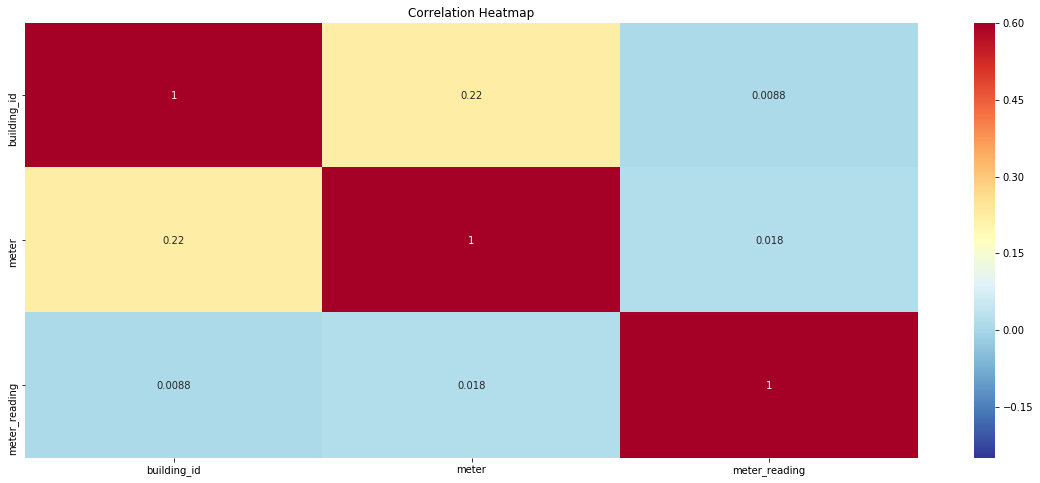

In [29]:
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# <a id='7'>7. Ploting</a>

<a href='#1'>Top</a>

In [30]:
train_df.building_id.nunique()

1449

- Let's check the distribution of target value in train dataset

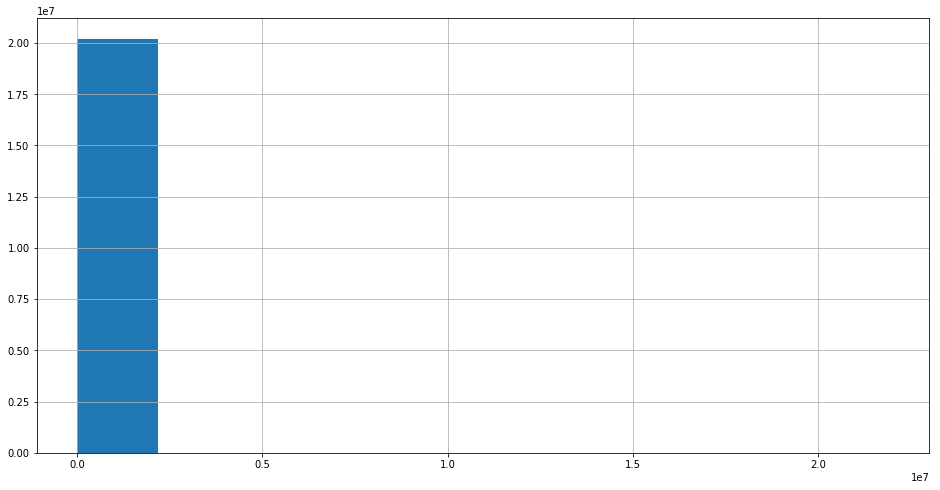

In [31]:
train_df['meter_reading'].hist(figsize=(16, 8))

In [32]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(weather_train_df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(weather_test_df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

> plot dist. curves for train and test weather data for air_temperature

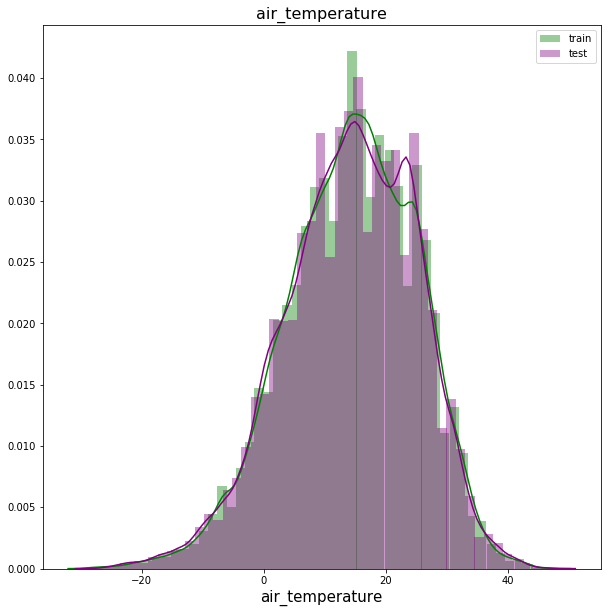

In [33]:
plot_dist_col('air_temperature')

> plot dist. curves for train and test weather data for cloud_coverage

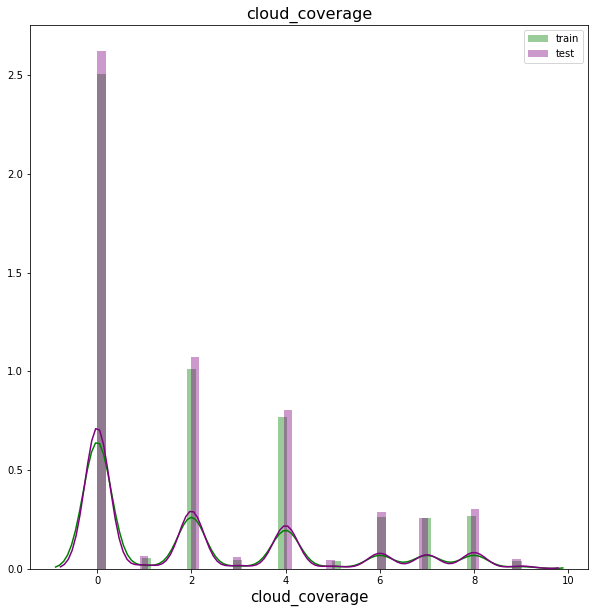

In [34]:
plot_dist_col('cloud_coverage')

> plot dist. curves for train and test weather data for dew_temperature

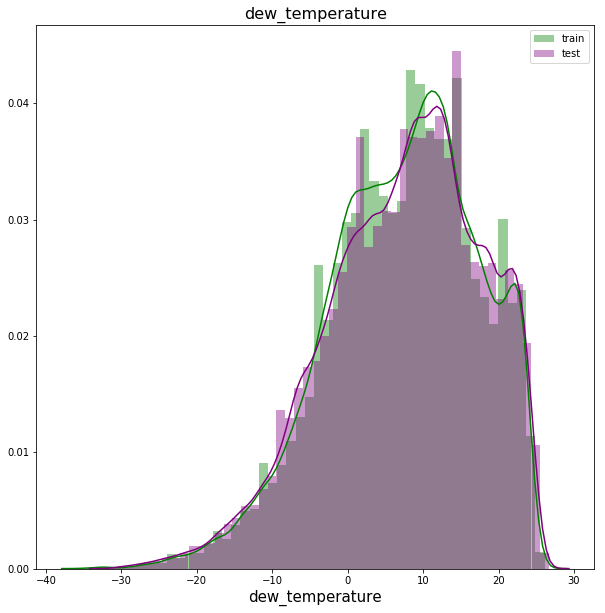

In [35]:
plot_dist_col('dew_temperature')

> plot dist. curves for train and test weather data for precip_depth_1_hr

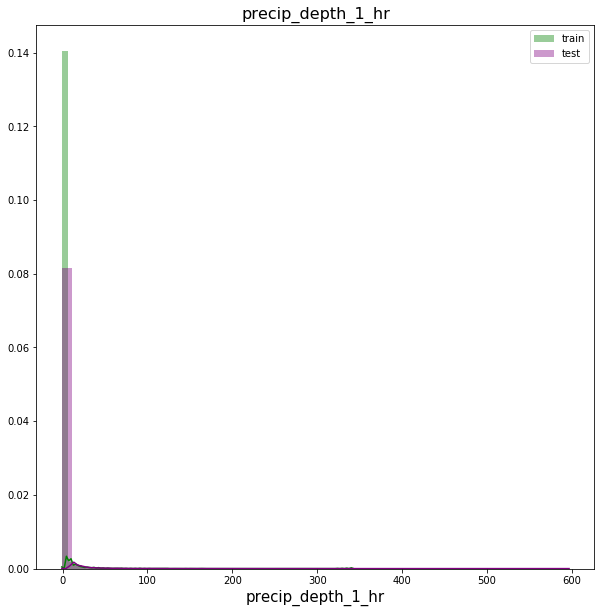

In [36]:
plot_dist_col('precip_depth_1_hr')

> plot dist. curves for train and test weather data for sea_level_pressure

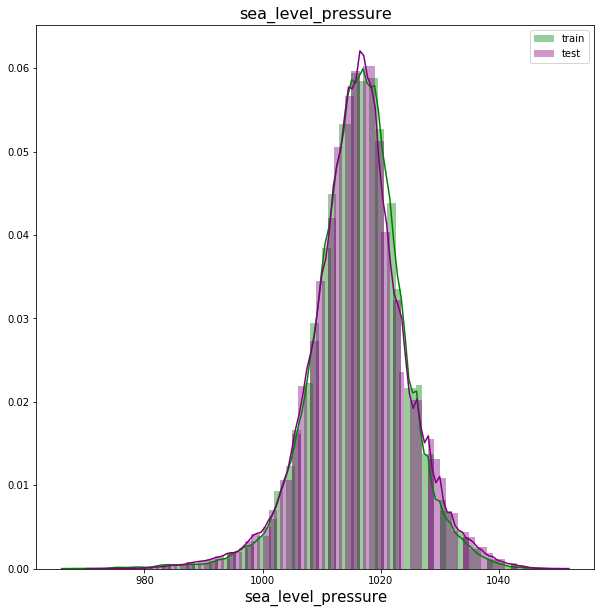

In [37]:
plot_dist_col('sea_level_pressure')

> plot dist. curves for train and test weather data for wind_direction

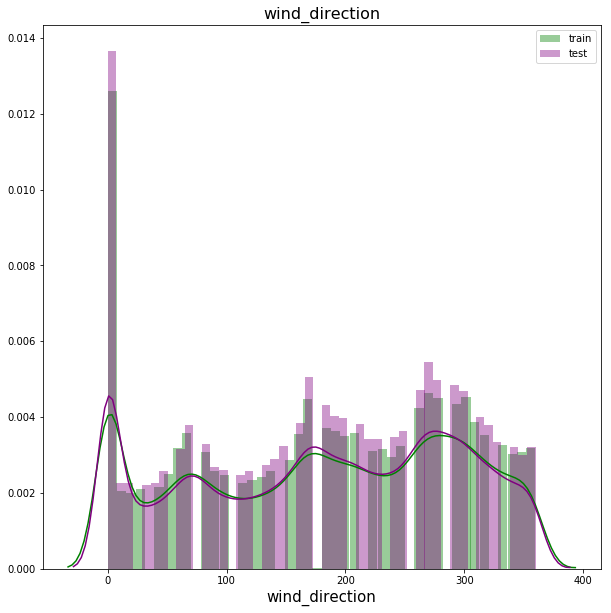

In [38]:
plot_dist_col('wind_direction')

> plot dist. curves for train and test weather data for wind_speed

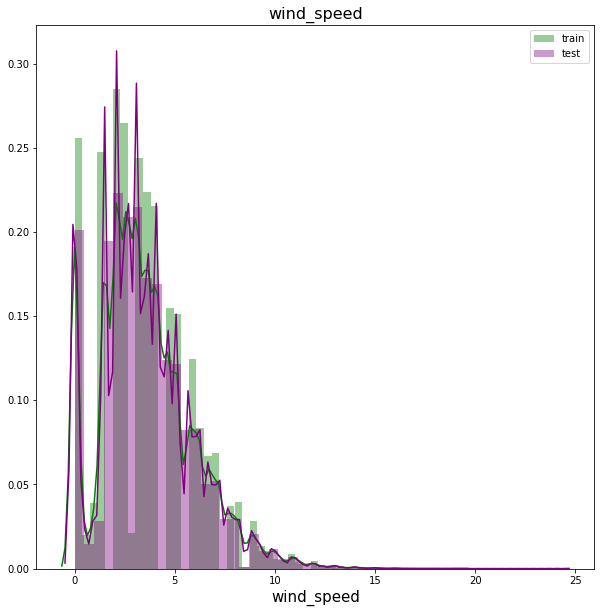

In [39]:
plot_dist_col('wind_speed')

# <a id='8'>8. Simple Single Series Analysis</a>


<a href='#1'>Top</a>

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

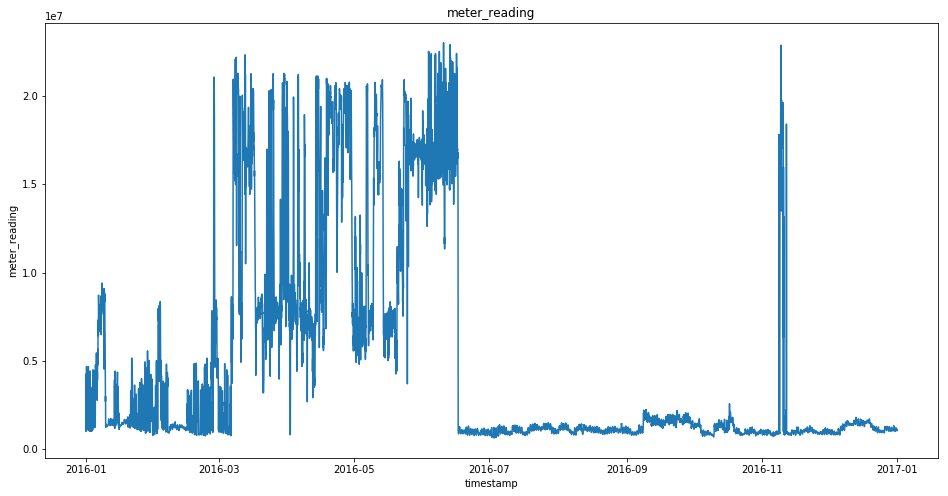

In [41]:
ts=train_df.groupby(["timestamp"])["meter_reading"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts);

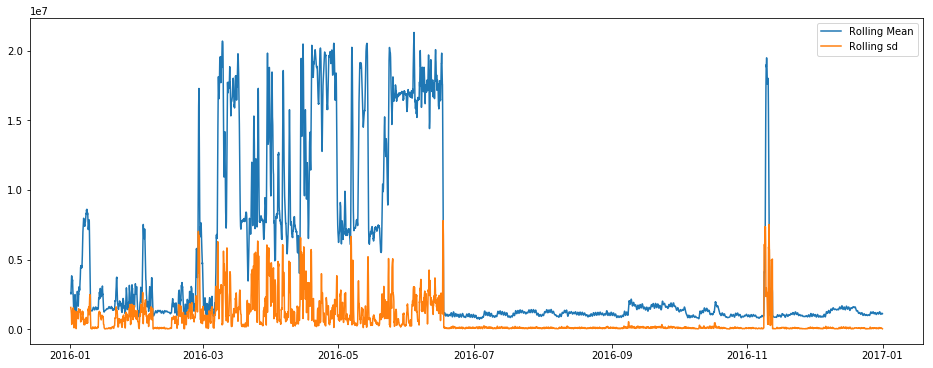

In [42]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

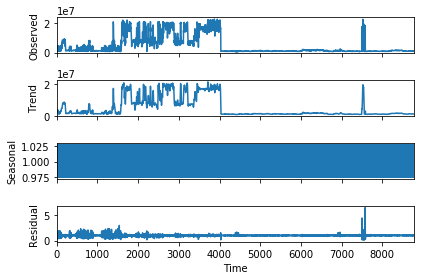

In [43]:

import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

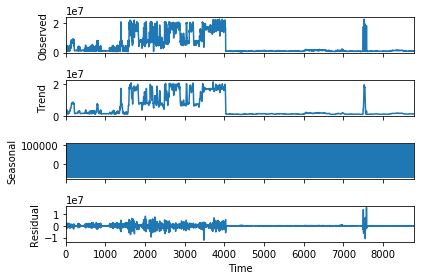

In [44]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

# <a id='9'>9. Outlier Distribution</a>


<a href='#1'>Top</a>

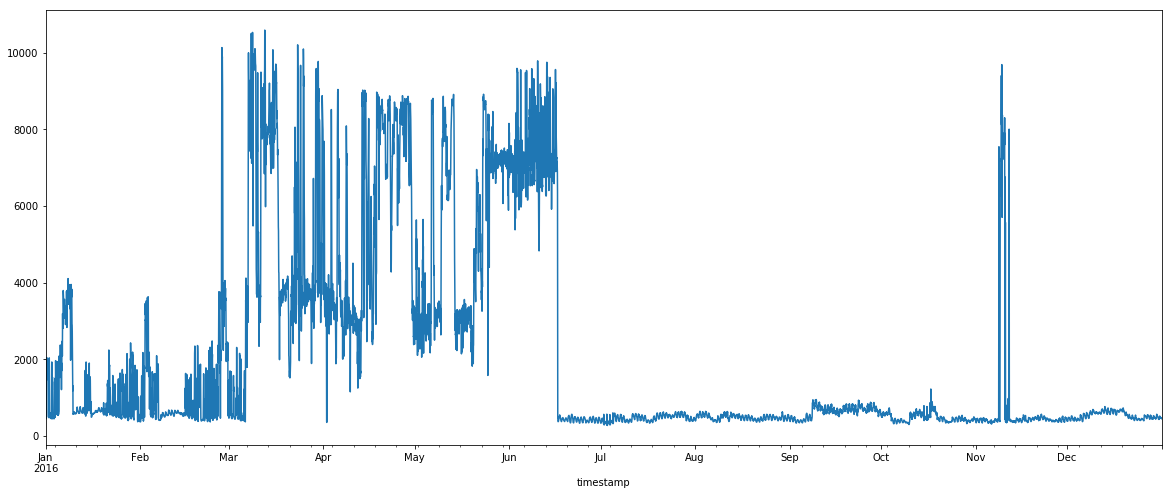

In [45]:
y_mean_time = train_df.groupby('timestamp').meter_reading.mean()
y_mean_time.plot(figsize=(20, 8))

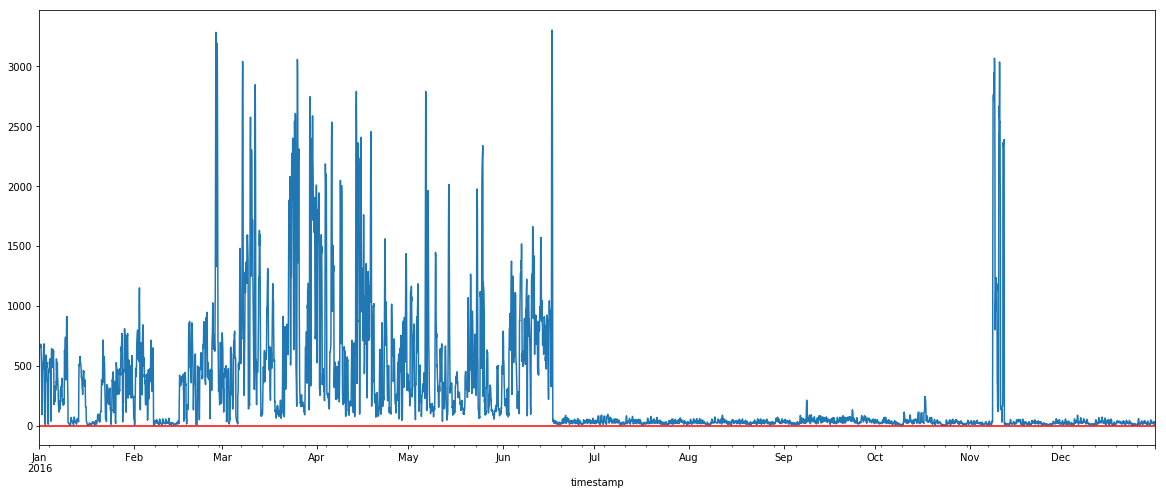

In [46]:
y_mean_time.rolling(window=10).std().plot(figsize=(20, 8))
ax = plt.axhline(y=0.009, color='red')

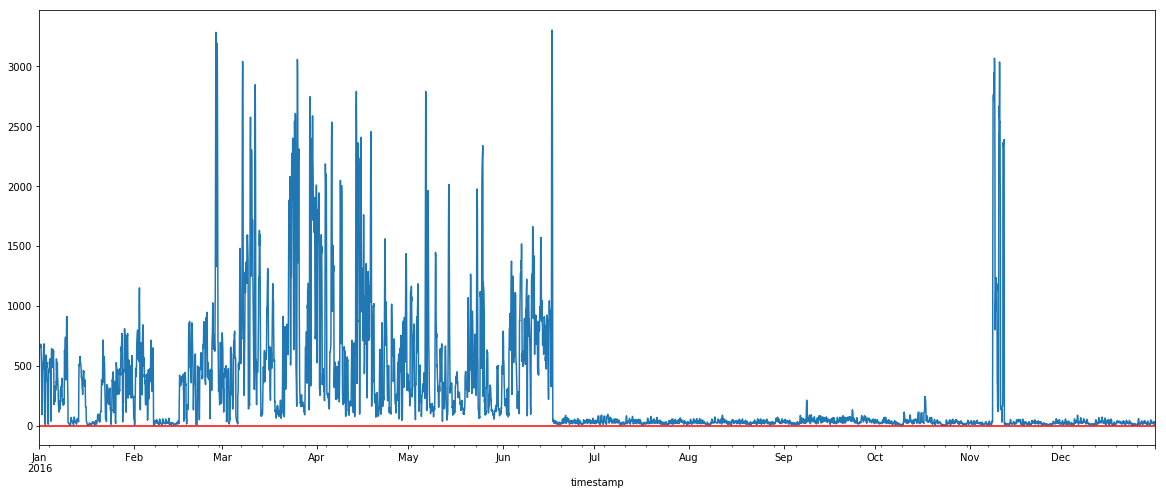

In [47]:
y_mean_time.rolling(window=10).std().plot(figsize=(20, 8))
plt.axhline(y=0.009, color='red')
plt.axvspan(0, 905, color='green', alpha=0.1)
plt.axvspan(906, 1505, color='red', alpha=0.1)


## <a id='9-1'>9.1. Group data in a daily basis</a>


Look this, by [juanmah](https://www.kaggle.com/juanmah) : [AHRAE Outliers](https://www.kaggle.com/juanmah/ashrae-outliers/notebook) (Upvote this!) 

In [48]:
train_df['meter'] = pd.Categorical(train_df['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
daily_train = train_df.copy()
daily_train['date'] = daily_train['timestamp'].dt.date
daily_train = daily_train.groupby(['date', 'building_id', 'meter']).sum()
daily_train

meter_reading
date       building_id meter                      
2016-01-01 0           electricity        0.000000
                       chilledwater            NaN
                       steam                   NaN
                       hotwater                NaN
           1           electricity        0.000000
...                                            ...
2016-12-31 1447        hotwater                NaN
           1448        electricity       79.974998
                       chilledwater            NaN
                       steam                   NaN
                       hotwater                NaN

[2121336 rows x 1 columns]

## <a id='9-2'>9.2. Aggregate the data for buildings</a>


In [49]:
daily_train_agg = daily_train.groupby(['date', 'meter']).agg(['sum', 'mean', 'idxmax', 'max'])
daily_train_agg = daily_train_agg.reset_index()
level_0 = daily_train_agg.columns.droplevel(0)
level_1 = daily_train_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]
daily_train_agg.columns = level_1 + level_0
daily_train_agg.rename_axis(None, axis=1)
daily_train_agg.head()

,date,meter,meter_reading-sum,meter_reading-mean,meter_reading-idxmax,meter_reading-max
0,2016-01-01,electricity,4.219648e+06,3037.903076,"(2016-01-01, 803, electricity)",1.160372e+05
1,2016-01-01,chilledwater,1.412169e+06,3090.084961,"(2016-01-01, 1289, chilledwater)",1.042116e+05
2,2016-01-01,steam,6.873201e+07,218891.734375,"(2016-01-01, 1099, steam)",5.095080e+07
3,2016-01-01,hotwater,1.609989e+06,11180.481445,"(2016-01-01, 1331, hotwater)",2.198245e+05
4,2016-01-02,electricity,4.288951e+06,3085.576416,"(2016-01-02, 803, electricity)",1.157768e+05


> ### Some plots

In [50]:
fig_total = px.line(daily_train_agg, x='date', y='meter_reading-sum', color='meter', render_mode='svg')
fig_total.update_layout(title='Total kWh per energy aspect')
fig_total.show()

The sum, facetted for each energy aspect, shows some aberrant values.

In [51]:
fig_maximum = px.line(daily_train_agg, x='date', y='meter_reading-max', color='meter', render_mode='svg')
fig_maximum.update_layout(title='Maximum kWh value per energy aspect')
fig_maximum.show()

Looking at the max value for each day, and for each energy aspect, shows that only a single building (for day and energy aspect) is causing the aberrant peaks

## <a id='9-3'>9.3. Identifying outliers</a>


In [52]:
daily_train_agg['building_id_max'] = [x[1] for x in daily_train_agg['meter_reading-idxmax']]
daily_train_agg.head()

,date,meter,meter_reading-sum,meter_reading-mean,meter_reading-idxmax,meter_reading-max,building_id_max
0,2016-01-01,electricity,4.219648e+06,3037.903076,"(2016-01-01, 803, electricity)",1.160372e+05,803
1,2016-01-01,chilledwater,1.412169e+06,3090.084961,"(2016-01-01, 1289, chilledwater)",1.042116e+05,1289
2,2016-01-01,steam,6.873201e+07,218891.734375,"(2016-01-01, 1099, steam)",5.095080e+07,1099
3,2016-01-01,hotwater,1.609989e+06,11180.481445,"(2016-01-01, 1331, hotwater)",2.198245e+05,1331
4,2016-01-02,electricity,4.288951e+06,3085.576416,"(2016-01-02, 803, electricity)",1.157768e+05,803


In [53]:
def show_building(building, energy_aspects=None):
    fig = px.line(daily_train.loc[(slice(None), building, slice(None)), :].reset_index(),
                  x='date',
                  y='meter_reading',
                  color='meter',
                  render_mode='svg')
    if energy_aspects:
        if 'electricity' not in energy_aspects:
            fig['data'][0].visible = 'legendonly'
        if 'chilledwater' not in energy_aspects:
            fig['data'][1].visible = 'legendonly'
        if 'steam' not in energy_aspects:
            fig['data'][2].visible = 'legendonly'
        if 'hotwater' not in energy_aspects:
            fig['data'][3].visible = 'legendonly'
    fig.update_layout(title='Building ID: {}'.format(building))        
    fig.show()
    display(building_metadata[building_metadata['building_id']==building])

> ### Electricity

In [54]:
print('Number of days that a building has the maximum electricity consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'electricity']['building_id_max'].value_counts())

Number of days that a building has the maximum electricity consumption of all the buildings:

803     192
801      65
799      58
1088     49
993       1
794       1
Name: building_id_max, dtype: int64


The max values of electricity are caused by only 6 buildings.

In [55]:
daily_train_electricity = daily_train_agg[daily_train_agg['meter']=='electricity'].copy()
daily_train_electricity['building_id_max'] = pd.Categorical(daily_train_electricity['building_id_max'])
fig_daily_electricity = px.scatter(daily_train_electricity,
                                   x='date',
                                   y='meter_reading-max',
                                   color='building_id_max',
                                   render_mode='svg')
fig_daily_electricity.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_electricity.show()

> ### Chilledwater

In [56]:
print('Number of days that a building has the maximum chilledwater consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'chilledwater']['building_id_max'].value_counts())

Number of days that a building has the maximum chilledwater consumption of all the buildings:

1284    134
76       92
1258     41
1289     38
778      37
1088     10
29       10
1156      2
60        1
50        1
Name: building_id_max, dtype: int64


The max values of electricity are caused by only 10 buildings.

In [57]:
daily_train_chilledwater = daily_train_agg[daily_train_agg['meter']=='chilledwater'].copy()
daily_train_chilledwater['building_id_max'] = pd.Categorical(daily_train_chilledwater['building_id_max'])
fig_daily_chilledwater = px.scatter(daily_train_chilledwater,
                                    x='date',
                                    y='meter_reading-max',  
                                    color='building_id_max', 
                                    render_mode='svg')
fig_daily_chilledwater.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_chilledwater.show()

> ### Steam

In [58]:
print('Number of days that a building has the maximum steam consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'steam']['building_id_max'].value_counts())

Number of days that a building has the maximum steam consumption of all the buildings:

1099    158
1197    101
1168    100
1148      7
Name: building_id_max, dtype: int64


The max values of electricity are caused by only 4 buildings.

In [59]:
daily_train_steam = daily_train_agg[daily_train_agg['meter']=='steam'].copy()
daily_train_steam['building_id_max'] = pd.Categorical(daily_train_steam['building_id_max'])
fig_daily_steam = px.scatter(daily_train_steam,
                             x='date',
                             y='meter_reading-max',
                             color='building_id_max',
                             render_mode='svg')
fig_daily_steam.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_steam.show()

> ### Hotwate

In [60]:
print('Number of days that a building has the maximum hotwater consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'hotwater']['building_id_max'].value_counts())

Number of days that a building has the maximum hotwater consumption of all the buildings:

1021    229
1331    120
1317      7
794       7
1323      1
1252      1
1232      1
Name: building_id_max, dtype: int64


The max values of electricity are caused by only 7 buildings. Practically, two of them

In [61]:
daily_train_hotwater = daily_train_agg[daily_train_agg['meter']=='hotwater'].copy()
daily_train_hotwater['building_id_max'] = pd.Categorical(daily_train_hotwater['building_id_max'])
fig_daily_hotwater = px.scatter(daily_train_hotwater,
                                x='date',
                                y='meter_reading-max',
                                color='building_id_max',
                                render_mode='svg')
fig_daily_hotwater.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_hotwater.show()

## <a id='6-3'>6.3 Examine Missing Values</a>


<p><font size="3" color="green" style="Comic Sans MS;">

    Taking only the buildings that consume more than the others, could be seen that there are a lot of measure scale errors.
    The error could be:

    The meter is not configured correctly. E.g., a bad voltage or current primary to secondary ratio.
    The software has not the units configured correctly. E.g., MJ/kg for steam.
    The software has not the decimal digits configured correctly.
    Using a power variable instead of an energy one.
    The measure could be done with an unique meter, or the sum of several of them.

    Some changes over time, values go to zero or the scale is changed, indicates that some buildings have more than one meter. One error in one meter and the overall measure is garbage.

    This notebook has only analised the outliers that influence the maximum consumption in a daily basis. This is only the tip of the iceberg. A sound analysis should be done to detect and correct these outliers.

    A solution to avoid scale errors is to normalize the values from 0 to 1, for each building and for each energy aspect.
</font></p>



# <a id='10'>10 Simple Feature Engineering and Modeling </a>


<a href='#1'>Top</a>

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [63]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

## <a id='10-1'>10.1 Building DF merge through concat  </a>




> - Convert timestamp 
> - Convert Strings to category


In [64]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
weather_train_df['timestamp'] = pd.to_datetime(weather_train_df['timestamp'])
weather_test_df['timestamp'] = pd.to_datetime(weather_test_df['timestamp'])
    
building_meta_df['primary_use'] = building_meta_df['primary_use'].astype('category')

In [65]:
   
temp_df = train_df[['building_id']]
temp_df = temp_df.merge(building_meta_df, on=['building_id'], how='left')
del temp_df['building_id']
train_df = pd.concat([train_df, temp_df], axis=1)

temp_df = test_df[['building_id']]
temp_df = temp_df.merge(building_meta_df, on=['building_id'], how='left')

del temp_df['building_id']
test_df = pd.concat([test_df, temp_df], axis=1)
del temp_df, building_meta_df



## <a id='10-2'>10.2 Weather DF merge over concat  </a>



In [66]:
temp_df = train_df[['site_id','timestamp']]
temp_df = temp_df.merge(weather_train_df, on=['site_id','timestamp'], how='left')

del temp_df['site_id'], temp_df['timestamp']
train_df = pd.concat([train_df, temp_df], axis=1)

temp_df = test_df[['site_id','timestamp']]
temp_df = temp_df.merge(weather_test_df, on=['site_id','timestamp'], how='left')

del temp_df['site_id'], temp_df['timestamp']
test_df = pd.concat([test_df, temp_df], axis=1)

del temp_df, weather_train_df, weather_test_df

# <a id='11'>11. ASHRAE - Data minification</a>


<a href='#1'>Top</a>

> Use can use train_df.pkl, test_df.pkl for FE, FS for your baseline_predict

In [67]:
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')
   
del train_df, test_df
gc.collect()

27

In [68]:
train_df = pd.read_pickle('train_df.pkl')
test_df = pd.read_pickle('test_df.pkl')


# <a id='12'>12. Some Features</a>


<a href='#1'>Top</a>

Kaggle competitions are won by feature engineering

> ### Stanford Professor Andrew Ng accurately said, “…applied machine learning is basically feature engineering.”
See this: https://blog.featurelabs.com/secret-to-data-science-success/

In [69]:
train_df['age'] = train_df['year_built'].max() - train_df['year_built'] + 1
test_df['age'] = test_df['year_built'].max() - test_df['year_built'] + 1


# <a id='13'>13. Encoding Variables</a>



<a href='#1'>Top</a>


Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as [LightGBM](Encoding Variables). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

You can see [this](https://www.kaggle.com/alexisbcook/categorical-variables):



## Label Encoding:
Label encoding assigns each unique value to a different integer.

![](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

In [70]:
le = LabelEncoder()
# train_df['primary_use'] = train_df['primary_use'].astype(str)
train_df['primary_use'] = le.fit_transform(train_df['primary_use']).astype(np.int8)

# test_df['primary_use'] = test_df['primary_use'].astype(str)
test_df['primary_use'] = le.fit_transform(test_df['primary_use']).astype(np.int8)



# <a id='14'>14. Handling missing values</a>




<a href='#1'>Top</a>

### Types of missing data
> It is helpful to create and test hypotheses around why the data would be potentially missing, it is because the sensor recording the data disconnected from the server, the person feeding paper forms into the spreadsheet missed it or is the data missing for a particular category of rows.

To streamline this though process it is useful to know the 3 categories in which missing data can be classified into:

* Missing Completely at Random (**MCAR**)
* Missing at Random (**MAR**)
* Missing Not at Random (**MNAR**)

Time series imputation
1. Non-time-series specific method
1. mean imputation
1. median imputation
1. mode imputation
1. calcucate the appropriate measure and replace NAs with the values.
#### appropriate for stationary time series, for example, white noise data

1. Random sample imputation
replace missing values with observations randomly selected from the remaining (either of it or just some section of it)
#### It is not likely to work well unless the random select is carefully chosen.


Time-Series specific method
* Last observation carried forward **(LOCF)**
* Next observation carried backward **(NOCB)**
* Linear interpolation
* Spline interpolation 

#### These methods rely on the assumption that adjacent observations are similar to one another. These methods do not work well when this assumption is not valid, especially when the presence of strong seasonality.

This kernel it's helpfull for this: https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners


Manually dealing with missing values will often improve model performance.

Our approach we input fill NaN = -999 just for the 4 features with most missing values

In [71]:

train_df['floor_count'] = train_df['floor_count'].fillna(-999).astype(np.int16)
test_df['floor_count'] = test_df['floor_count'].fillna(-999).astype(np.int16)

train_df['year_built'] = train_df['year_built'].fillna(-999).astype(np.int16)
test_df['year_built'] = test_df['year_built'].fillna(-999).astype(np.int16)

train_df['age'] = train_df['age'].fillna(-999).astype(np.int16)
test_df['age'] = test_df['age'].fillna(-999).astype(np.int16)

train_df['cloud_coverage'] = train_df['cloud_coverage'].fillna(-999).astype(np.int16)
test_df['cloud_coverage'] = test_df['cloud_coverage'].fillna(-999).astype(np.int16) 


> ### Some datetime features

In [72]:
train_df['month_datetime'] = train_df['timestamp'].dt.month.astype(np.int8)
train_df['weekofyear_datetime'] = train_df['timestamp'].dt.weekofyear.astype(np.int8)
train_df['dayofyear_datetime'] = train_df['timestamp'].dt.dayofyear.astype(np.int16)
    
train_df['hour_datetime'] = train_df['timestamp'].dt.hour.astype(np.int8)  
train_df['day_week'] = train_df['timestamp'].dt.dayofweek.astype(np.int8)
train_df['day_month_datetime'] = train_df['timestamp'].dt.day.astype(np.int8)
train_df['week_month_datetime'] = train_df['timestamp'].dt.day/7
train_df['week_month_datetime'] = train_df['week_month_datetime'].apply(lambda x: math.ceil(x)).astype(np.int8)
    
train_df['year_built'] = train_df['year_built']-1900
train_df['square_feet'] = np.log(train_df['square_feet'])
    
test_df['month_datetime'] = test_df['timestamp'].dt.month.astype(np.int8)
test_df['weekofyear_datetime'] = test_df['timestamp'].dt.weekofyear.astype(np.int8)
test_df['dayofyear_datetime'] = test_df['timestamp'].dt.dayofyear.astype(np.int16)
    
test_df['hour_datetime'] = test_df['timestamp'].dt.hour.astype(np.int8)
test_df['day_week'] = test_df['timestamp'].dt.dayofweek.astype(np.int8)
test_df['day_month_datetime'] = test_df['timestamp'].dt.day.astype(np.int8)
test_df['week_month_datetime'] = test_df['timestamp'].dt.day/7
test_df['week_month_datetime'] = test_df['week_month_datetime'].apply(lambda x: math.ceil(x)).astype(np.int8)
    
test_df['year_built'] = test_df['year_built']-1900
test_df['square_feet'] = np.log(test_df['square_feet'])

<a href='#1'>Top</a>

# Model in ⚡🔌ASHRAE : Lgbm Simple FE 
> ## See this: [⚡🔌ASHRAE : Lgbm Simple FE](https://www.kaggle.com/caesarlupum/ashrae-ligthgbm-simple-fe) 

  > ⚡ Please, you can use parts of this notebook in your own scripts or kernels, no problem, but please give credit (for example link back to this, see this...)

# <a id='18'>ASHRAE Energy prediction - summary</a>


<a href='#1'>Top</a>

<html>
<body>

<p><font size="4" color="Green"> ASHRAE Standard 90.1 2010, Part III -- HVAC Provisions</font></p>

</body>
</html>


In [73]:
HTML('<iframe width="829" height="622" src="https://www.youtube.com/embed/ABAR8TIwce4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

<html>
<body>

<p><font size="4" color="Green"> ASHRAE -- What It Is and Where It Is Going</font></p>

</body>
</html>


In [74]:
HTML('<iframe width="847" height="622" src="https://www.youtube.com/embed/wjRJsbj3X00" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

> ## General findings

Published Articles on Energy Consumtion Prediction

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113080#latest-665324

Geo location:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115040#latest-667889
https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115698#latest-667385
https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115698#latest-667385

Outliers:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113254

Holidays:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113286

Metric:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064#latest-663076




<html>
<body>

<p><font size="5" color="Blue">If you like my kernel please consider upvoting it</font></p>
<p><font size="4" color="Green">Don't hesitate to give your suggestions in the comment section</font></p>

</body>
</html>


# <a id='17'>17. Final</a>